[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/tutorial/notebooks/timepix3_event_nexus)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [1]:
from __code import system
from __code.timepix3_event_nexus.timepix3_event_nexus import Timepix3EventNexus

system.System.select_working_dir(facility='SNS', instrument='SNAP')
from __code.__all import custom_style
custom_style.style()

import matplotlib.pyplot as plt
%matplotlib notebook

** Using Debugging Mode! **


## Prepare UI engine 

In [2]:
# %gui qt

# Select Event NeXus

In [3]:
# DEBUGGING ONLY

# He3
#working_dir = "/Users/j35/SNS/SNAP/IPTS-30008/nexus/"
#working_dir = "/Volumes/JeanHardDrive/SNS/SNAP/IPTS-30008/nexus/"
nexus_filename = 'SNAP_58700.nxs.h5'

# MCP
working_dir = "/Users/j35/SNS/SNAP/IPTS-30008/nexus/"
nexus_filename = "run58704_events.h5"


o_event = Timepix3EventNexus(working_dir=system.System.get_working_dir())
#o_event = Timepix3EventNexus(working_dir=working_dir)
#o_event.select_nexus()

import os
nexus_file = os.path.join(working_dir, nexus_filename)
assert os.path.exists(nexus_file)
o_event.load_nexus(nexus_file_name=nexus_file)
o_event.rebin_and_display_data()



In [5]:
print(len(o_event.x_array))
print(len(o_event.y_array))
print(len(o_event.tof_ns))

8920219
8920219
8920219


In [23]:
import numpy as np

tof_ns = o_event.tof_ns
x_array = o_event.x_array
y_array = o_event.y_array

nbr_bin = 10000

#indexes with NaN
index_nan = np.where(np.isnan(tof_ns))

# remove those x, y and tof_nx
tof_ns_cleaned = np.delete(tof_ns, index_nan)
x_array_cleaned = np.delete(x_array, index_nan)
y_array_cleaned = np.delete(y_array, index_nan)

histo_tof, bins_tof = np.histogram(tof_ns_cleaned, nbr_bin)

In [25]:
    bins_tof

array([0.00000000e+00, 1.66666500e+03, 3.33333000e+03, ...,
       1.66633167e+07, 1.66649833e+07, 1.66666500e+07])

In [4]:
working_dir = "/Users/j35/SNS/SNAP/IPTS-30008/nexus/"
nexus_filename = "run58704_events.h5"

nexus_file = os.path.join(working_dir, nexus_filename)

In [5]:
import h5py
import numpy as np

In [6]:
with h5py.File(nexus_file, 'r') as f:
    data = np.array(f['entry']['monitor2']['event_time_offset'])

KeyError: "Unable to open object (object 'entry' doesn't exist)"

In [38]:
tof_min = data.min()
tof_max = data.max()
nbr_bin = 5
delta_bin = int((tof_max - tof_min) / nbr_bin)
print(f"delta_bin= {delta_bin}")

histo_data, bins_array = np.histogram(data, int(delta_bin))

delta_bin= 3333


In [39]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


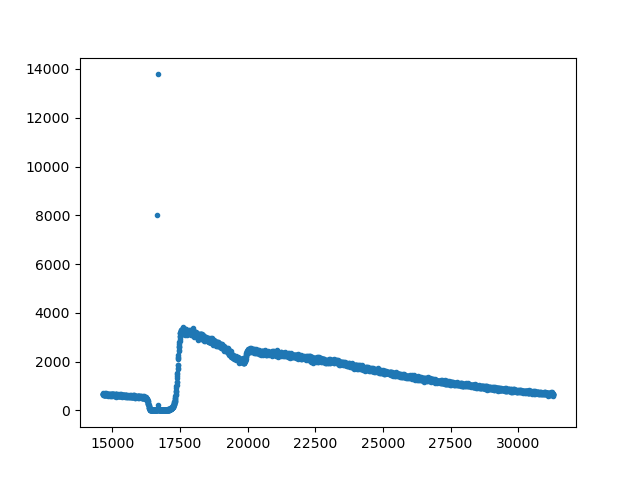

In [42]:
plt.plot(bins_array[:-1], histo_data, '.')

# Select Open Beam Input Folder 

In [ ]:
o_bragg.select_ob_folder()

# Select Background Region

### Select how many random files to use to select various ROIs

In [ ]:
o_bragg.how_many_data_to_use_to_select_sample_roi()

### Select background region in integrated image

In [ ]:
o_bragg.define_integrated_sample_to_use()
o_background = Interface(data=o_bragg.final_image)
o_background.show()

# Normalize Data 

In [ ]:
o_bragg.normalization(o_background=o_background)

# Powder Element(s) to Use to Compare the Bragg Edges  

In [ ]:
o_bragg.list_elements()

## List Bragg Edges 

In [ ]:
o_bragg.list_powder_bragg_edges()

# Select Sample ROI 

In [ ]:
o_sample = Interface(data=o_bragg.final_image)
o_sample.show()

# Define Experiment Setup

In [ ]:
o_bragg.exp_setup()

# Calculate Bragg Edges Data 

In [ ]:
o_bragg.calculate_counts_vs_file_index_of_regions_selected(list_roi=o_sample.list_roi)
o_bragg.load_time_spectra()

# Display Bragg Edges vs Signal

Run the next cell **only if** you want to display the signal Counts vs lambda 

In [ ]:
o_bragg.plot()

# Export Data 

In [ ]:
o_bragg.select_output_data_folder()

In [ ]:
o_bragg.select_output_table_folder()